In [1]:
import GPy
import pandas as pd
import numpy as np
import komatsu
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
Y = mamouryo[0][:, None]
X = hasaki.transpose(1, 0)
print(Y.shape, X.shape)
n_features = X.shape[1]
print(n_features)

(50, 1) (50, 37)
37


In [4]:
# kernel = GPy.kern.RBF(n_features, variance=0.01, ARD=True)
kernel = GPy.kern.Matern52(n_features, ARD=True)


In [5]:
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)

A Jupyter Widget

 /Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


In [6]:
pred_Y = model.predict_quantiles(X, quantiles=(2.5, 50, 97.5))[0]

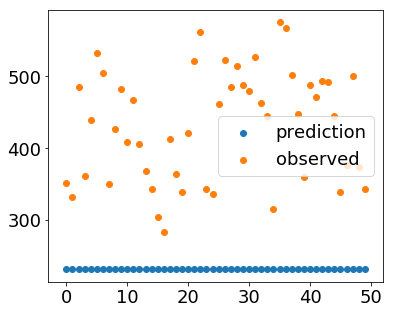

In [7]:
plt.figure(figsize=(6, 5))
xs = list(range(50))
plt.scatter(xs, pred_Y, label="prediction")
plt.scatter(xs, Y, label="observed")
plt.legend(loc="best")
plt.show()

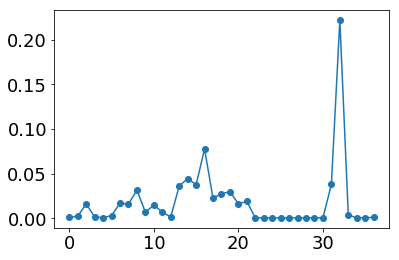

In [8]:
ls = list(model.kern.lengthscale)
weights = [1 / v for v in ls]
xs = list(range(len(weights)))
plt.plot(xs, weights, marker="o")
plt.show()
# 32